# 기계학습 13주차 실습 자료
#### 조교 : 김도경

# 지난주 내용
1. Tensorflow란?
    - 구글에서 만든, 딥러닝 프로그램을 쉽게 구현할 수 있도록 다양한 기능을 제공해주는 라이브러리
2. Tensorflow 장점
3. tensorflow와 numpy 호환 확인
4. 딥러닝에서 텐서
5. tensorflow가 제공하는 데이터셋의 텐서 구조
    - MNIST, cifar10, Boston housing, Reuters 데이터셋의 텐서 구조 확인
6. tensorflow 프로그래밍 : 퍼셉트론 학습
    - Variable 함수는 기울기를 구하고 가중치를 갱신하는 연산을 제공
7. Keras 사용하기
8. 케라스 프로그래밍 : 퍼셉트론 학습
    - 데이터 구축 -> 신경망 구조 설계 -> 학습 -> 예측
9. 다층 퍼셉트론으로 MNIST 데이터를 인식하는 프로그래밍
10. 학습 곡선 시각화
    - hist 객체가 가진 정보를 이용하여 학습 곡선을 그림


# fashion MNIST 데이터
- MNIST와 비슷
- 내용이 패션 관련 그림이고 레이블이 {T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot}인 점만 다름


# fashion MNIST를 인식하는 프로그램 
- 단계 1: 데이터 준비

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential # 층을 한 줄로 쌓는데 사용 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# fashion_mnist 읽어 와서 신경망에 입력할 형태로 변환 
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # reshape 함수로 2차원 구조의 텐서를 1차원 구조로 변환 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # float 32 데이터형으로 변환하고 [0,255] 범위를 [0,1] 범위로 정규화
x_test=x_test.astype(np.float32)/255.0 # ndarray로 변환 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환 
y_test = tf.keras.utils.to_categorical(y_test,10)


[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


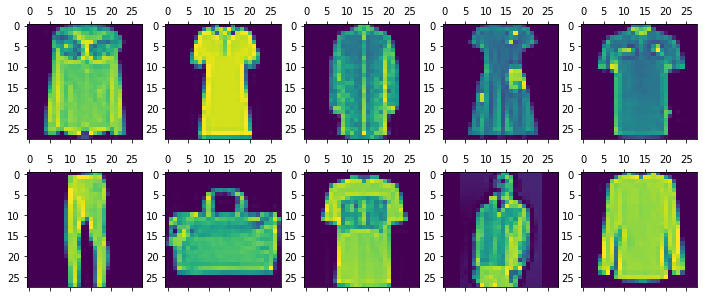

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# 랜덤하게 몇 가지 data 가져오기
random_pick = np.random.randint(low=0, high=10000, size=10)
random_pick
# array([3898, 6815, 6640, 2924,  451, 2688,  633, 6563, 5993, 4024])


figure = plt.figure()
figure.set_size_inches(12, 5)

axes = []
for i in range(1, 11):
    axes.append(figure.add_subplot(2, 5, i))

tmp_list = []
for i in range(10):
    tmp = x_train[60000 - random_pick[i]]
    tmp = tmp.reshape(-1, 28)
    tmp_list.append(tmp)
    
print(y_test[random_pick])

for i in range(10):
    axes[i].matshow(tmp_list[i])

- 단계 2 : 신경망 구조 설계
  - 신경망의 입력층, 은닉층, 출력층의 노드 개수 설정 
  - Sequential 모델을 생성하여 mlp 객체에 저장 
  - 은닉층을 추가 (input_shape은 입력층, units은 현재 쌓고 있는 은닉층으로 설정) 
  - 출력층을 추가 (input_shape은 생략 가능, units은 현재 쌓고 있는 출력층으로 설정) 

In [ ]:
n_input = 784
n_hidden=1024
n_output=10

mlp = Sequential()
mlp.add(Dense(units = n_hidden, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units = n_output, activation='tanh', kernel_initializer='random_uniform',bias_initializer='zeros'))

- 단계 3 : 신경망 학습 
  - compile 함수로 학습을 준비함 (loss 매개변수는 손실함수, optimizers는 옵티마이저 설정) 
  - fit 함수는 실제 학습을 수행(batch_size는 미니배치 크기, epochs는 최대 학습수, validation_data는 학습 도중에 사용할 검증 집합 설정)

- 단계 4 : 예측
  - evaluate 함수로 accuracy 측정 

In [ ]:
# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size = 128, epochs=30,validation_data = (x_test,y_test),verbose=2)

# 학습된 신경망으로 예측
res = mlp.evaluate(x_test,y_test,verbose = 0)
print('accuracy = ',res[1]*100)

Epoch 1/30
469/469 - 6s - loss: 0.0723 - accuracy: 0.7099 - val_loss: 0.0335 - val_accuracy: 0.8261
Epoch 2/30
469/469 - 6s - loss: 0.0302 - accuracy: 0.8439 - val_loss: 0.0302 - val_accuracy: 0.8380
Epoch 3/30
469/469 - 6s - loss: 0.0267 - accuracy: 0.8587 - val_loss: 0.0264 - val_accuracy: 0.8496
Epoch 4/30
469/469 - 6s - loss: 0.0249 - accuracy: 0.8677 - val_loss: 0.0292 - val_accuracy: 0.8498
Epoch 5/30
469/469 - 6s - loss: 0.0236 - accuracy: 0.8751 - val_loss: 0.0254 - val_accuracy: 0.8594
Epoch 6/30
469/469 - 6s - loss: 0.0225 - accuracy: 0.8808 - val_loss: 0.0258 - val_accuracy: 0.8660
Epoch 7/30
469/469 - 6s - loss: 0.0213 - accuracy: 0.8861 - val_loss: 0.0257 - val_accuracy: 0.8668
Epoch 8/30
469/469 - 6s - loss: 0.0206 - accuracy: 0.8901 - val_loss: 0.0223 - val_accuracy: 0.8745
Epoch 9/30
469/469 - 6s - loss: 0.0198 - accuracy: 0.8947 - val_loss: 0.0224 - val_accuracy: 0.8770
Epoch 10/30
469/469 - 6s - loss: 0.0194 - accuracy: 0.8962 - val_loss: 0.0236 - val_accuracy: 0.8785

## 학습 곡선 시각화 
- hist 객체가 가진 정보를 이용하여 학습 곡선을 그림 

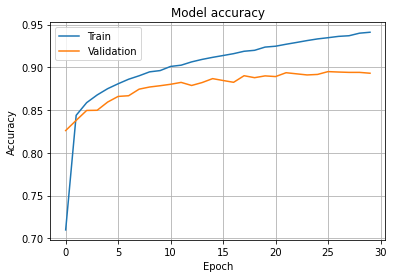

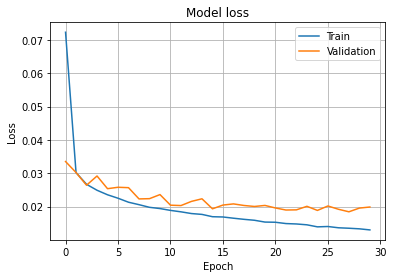

In [ ]:
import matplotlib.pyplot as plt

# accuracy 곡선 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.grid()
plt.show()

# 깊은 다층 퍼셉트론
- 다층 퍼셉트론에 은닉층을 더 많이 추가하면 깊은 다층 퍼셉트론
- 가장 쉽게 생각할 수 있는 딥러닝 모델

#깊은 다층 퍼셉트론 프로그래밍
- 깊은 다층 퍼셉트론으로 MNIST 인식
- 단지 은닉층 1개가 4개로 확장된 차이

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential # 층을 한 줄로 쌓는데 사용 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# fashion_mnist 읽어 와서 신경망에 입력할 형태로 변환 
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # reshape 함수로 2차원 구조의 텐서를 1차원 구조로 변환 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # float 32 데이터형으로 변환하고 [0,255] 범위를 [0,1] 범위로 정규화
x_test=x_test.astype(np.float32)/255.0 # ndarray로 변환 
y_train = tf.keras.utils.to_categorical(y_train,10) # 레이블을 원핫 코드로 변환 
y_test = tf.keras.utils.to_categorical(y_test,10)


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
n_input = 784
n_hidden1=1024
n_hidden2=512
n_hidden3=512
n_hidden4=512
n_output=10

mlp = Sequential()
mlp.add(Dense(units = n_hidden1, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units = n_hidden2, activation='tanh', kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units = n_hidden3, activation='tanh', kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units = n_hidden4, activation='tanh', kernel_initializer='random_uniform',bias_initializer='zeros'))
mlp.add(Dense(units = n_output, activation='tanh', kernel_initializer='random_uniform',bias_initializer='zeros'))

In [ ]:
# 신경망 학습
mlp.compile(loss='mean_squared_error',optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size = 128, epochs=30,validation_data = (x_test,y_test),verbose=2)

# 학습된 신경망으로 예측
res = mlp.evaluate(x_test,y_test,verbose = 0)
print('accuracy = ',res[1]*100)



Epoch 1/30
469/469 - 16s - loss: 0.0254 - accuracy: 0.8993 - val_loss: 0.0134 - val_accuracy: 0.9421
Epoch 2/30
469/469 - 15s - loss: 0.0104 - accuracy: 0.9536 - val_loss: 0.0081 - val_accuracy: 0.9622
Epoch 3/30
469/469 - 15s - loss: 0.0072 - accuracy: 0.9664 - val_loss: 0.0076 - val_accuracy: 0.9621
Epoch 4/30
469/469 - 15s - loss: 0.0056 - accuracy: 0.9736 - val_loss: 0.0057 - val_accuracy: 0.9731
Epoch 5/30
469/469 - 15s - loss: 0.0045 - accuracy: 0.9787 - val_loss: 0.0049 - val_accuracy: 0.9744
Epoch 6/30
469/469 - 15s - loss: 0.0038 - accuracy: 0.9820 - val_loss: 0.0053 - val_accuracy: 0.9719
Epoch 7/30
469/469 - 15s - loss: 0.0035 - accuracy: 0.9846 - val_loss: 0.0043 - val_accuracy: 0.9764
Epoch 8/30
469/469 - 15s - loss: 0.0030 - accuracy: 0.9864 - val_loss: 0.0043 - val_accuracy: 0.9769
Epoch 9/30
469/469 - 15s - loss: 0.0027 - accuracy: 0.9881 - val_loss: 0.0041 - val_accuracy: 0.9775
Epoch 10/30
469/469 - 15s - loss: 0.0024 - accuracy: 0.9895 - val_loss: 0.0045 - val_accura

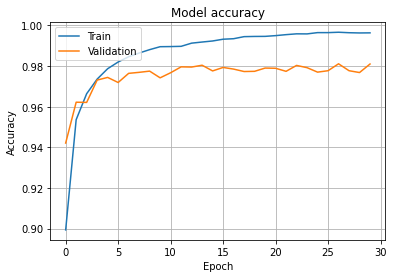

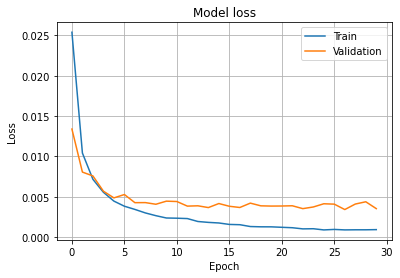

In [ ]:
import matplotlib.pyplot as plt

# accuracy 곡선 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.grid()
plt.show()

# 실험 결과 
- 98.1
- 다층 퍼셉트론의 97.79%에 비해 0.31% 향상

# 가중치 초기화 방법 
- kernel_initializer=‘random_uniform’으로 설정했으므로 균일 분포에서 난수 생성하여 가중치를 초기화함

- Dense 함수의 API 

    - kernel_initializer의 기본값은 ‘glorot_uniform’
    
    Dense(units , activation=None, kernel_initializer=__'glorot_uniform'__,bias_initializer=__'zeros'__)

    - glorot_uniform은 [Glorot2010]에서 유래하는데, 텐서플로는 좋은 성능이 입증되었다고 판단하여 기본값으로 제공함(보통 균일 분포보다 우수한 성능을 제공한다고 알려짐)
- 이런 사실에 따라 앞으로는 생략하여 glorot_uniform을 사용
    - 성능 향상 효과
    - 파이썬 코드가 간결해지는 효과

    
    mlp.add(Dense(units = n_hidden1, activation='tanh', input_shape=(n_input,))
    mlp.add(Dense(units = n_hidden2, activation='tanh')
    mlp.add(Dense(units = n_hidden3, activation='tanh')
    mlp.add(Dense(units = n_hidden4, activation='tanh')
    mlp.add(Dense(units = n_output, activation='tanh')

    



# 딥러닝의 학습 전략 

- 층이 깊어지면 현실적인 문제 발생
    - 그레이디언트 소멸 문제
    - 과잉 적합 문제


# 그레이디언트 소멸 문제와 해결책 
- 그레이디언트 소멸 문제
    - 미분의 연쇄 법칙chain rule에 따르면,
l번째 층의 그레이디언트는 오른쪽에 있는 l+1번째 층의 그레이디언트에 자신 층에서 발생한 그레이디언트를 곱하여 구함
    - 따라서 그레이디언트가 0.001처럼 작은 경우 왼쪽으로 진행하면서 점점 작아짐
    - 왼쪽으로 갈수록 가중치 갱신이 느려져서 전체 신경망의 학습이 매우 느린 현상이 발생

- 해결책 

    1) 병렬 처리
    - GPU 사용 또는 colab에서 TPU(Tensor Processing Unit) 설정
        - 구글이 신경망 학습을 빠르게 할 목적으로 개발한 기계학습 전용 병렬 처리 기계

  2) ReLU 함수 사용
    - Tanh(s) 시그모이드 함수의 문제점
    
    s가 클 때 그레이디언트가 0에 가까워짐(s=8이면 그레이디언트 값은 0.0000004501)
    - ReLU는 s가 음수일 때 그레이디언트는 0, 양수일 때 1





## 과잉 적합과 과소 적합 회피 전략 
- 모델로 1차 다항식을 사용하면 과소 적합(under fitting)
    - 데이터에 비해 모델 용량이 작은 상황
- 용량이 가장 큰 12차 다항식은 훈련 집합에 대해 가장 적은 오류을 내지만 과잉 적합(over fitting)
    - 데이터의 복잡도에 비해 너무 큰 용량의 모델을 사용한 것  


# 딥러닝의 과잉 적합 회피 전략

- 데이터 양을 늘림
    - 데이터 양을 늘릴 수 없는 상황에서는 훈련 샘플을 변형하여 인위적으로 늘리는 데이터 증대(data augmentation) 사용
- 규제 기법 적용 
  - 데이터 증대, 가중치 감쇠, 드롭아웃, 앙상블 등 
